## 선그래프
+ 시간에 따른 데이터 변화 - 시계열 데이터 시각화
    - 지난 10년간의 평균 경유 가격
    - 지난 두 달간의 몸무게 변화
+ plot(x, y, type='l')
+ lines(x, y)

### 학생 10명의 키 데이터 시각화

In [4]:
load('heights.rdata')

In [5]:
heights

[1] 170 165 182 156 142 165 159 147 175 172

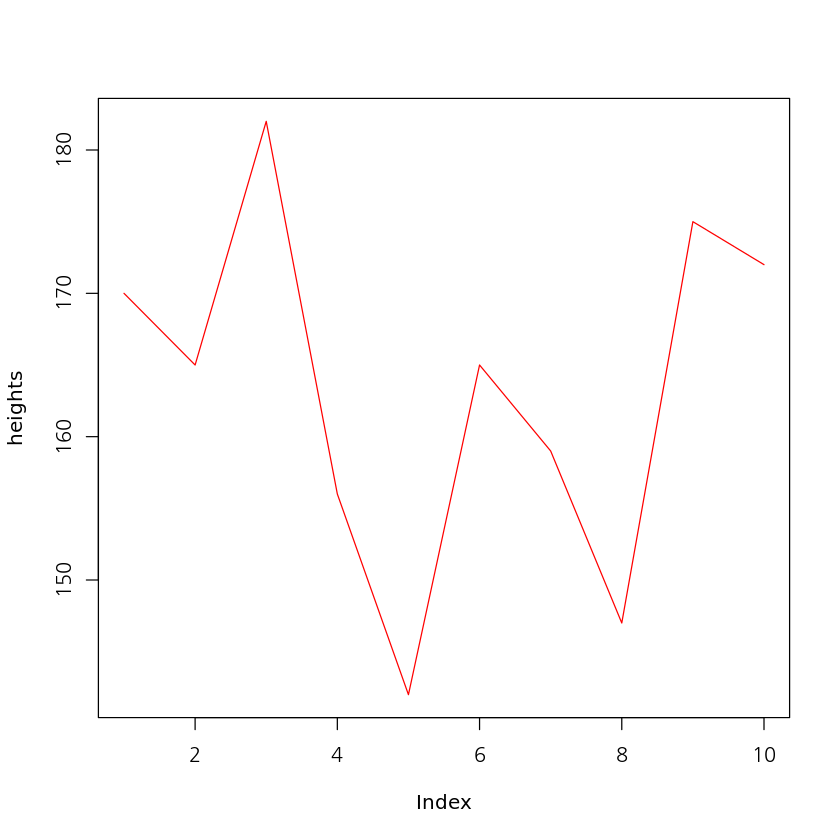

In [9]:
plot(heights, type='l', col='red')

### 항공사 승객 데이터

In [13]:
?AirPassengers

AirPassengers {datasets},R Documentation


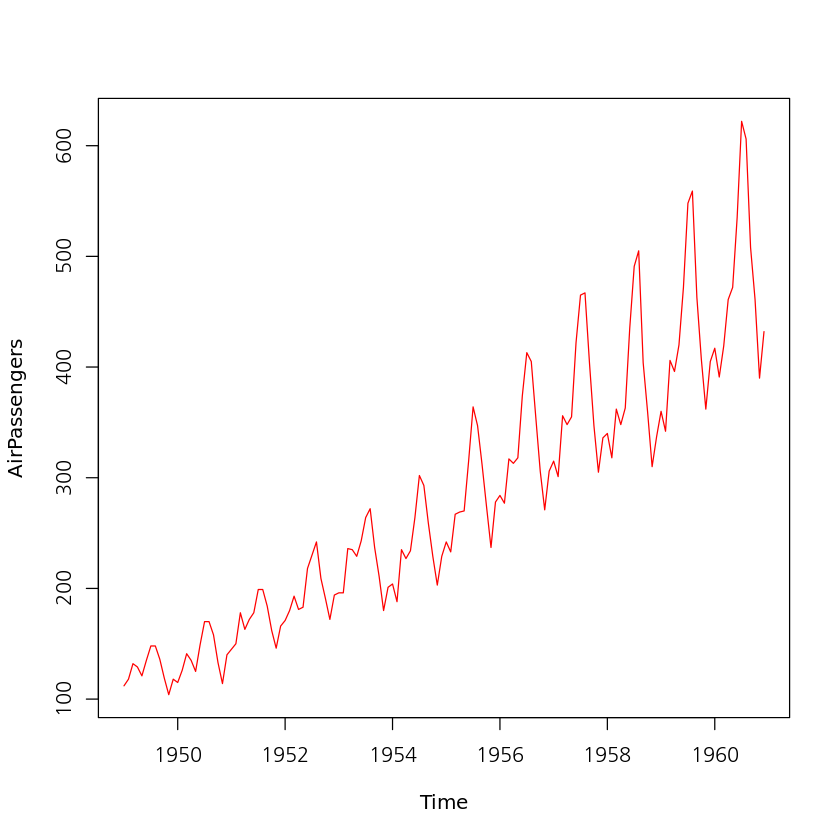

In [14]:
plot(AirPassengers, type='l', col='red')

### 나일강 홍수 데이터

In [22]:
?Nile

Nile {datasets},R Documentation


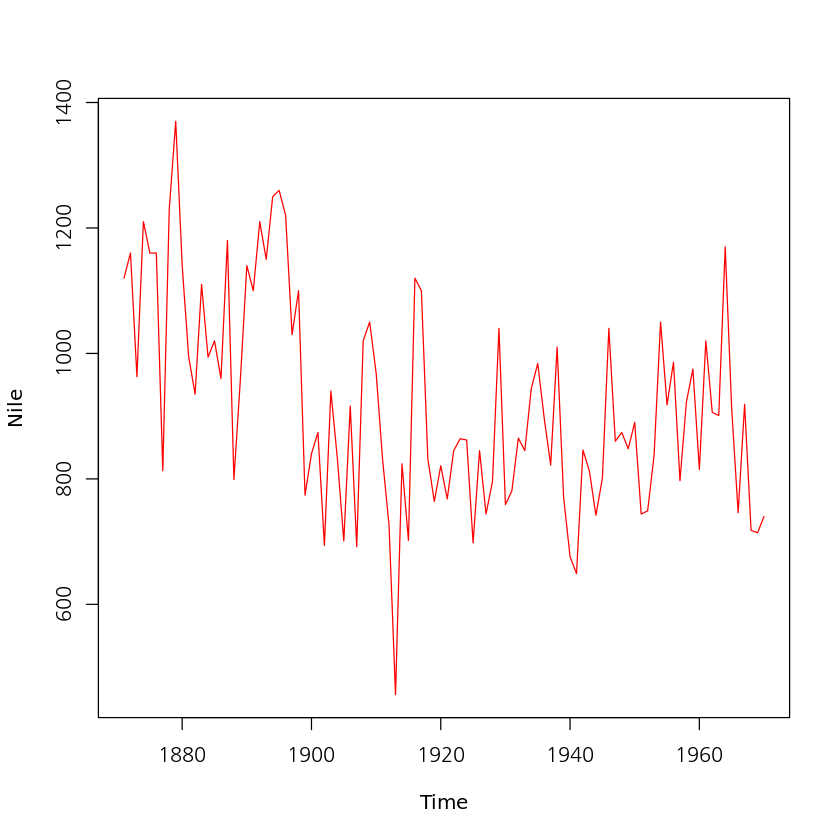

In [16]:
plot(Nile, col='red', type='l')

In [18]:
str(Nile)

 Time-Series [1:100] from 1871 to 1970: 1120 1160 963 1210 1160 1160 813 1230 1370 1140 ...


In [19]:
summary(Nile)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  456.0   798.5   893.5   919.4  1032.5  1370.0 

In [20]:
head(Nile)

[1] 1120 1160  963 1210 1160 1160

In [21]:
Nile

A Time Series:
  [1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740

In [23]:
mean(Nile)

[1] 919.35

In [25]:
sqrt(sum((Nile - sum(Nile)/length(Nile))^2) / (length(Nile) -1))

[1] 169.2275

In [26]:
sd(Nile)

[1] 169.2275

### 존슨앤존슨 분기별 주식데이터

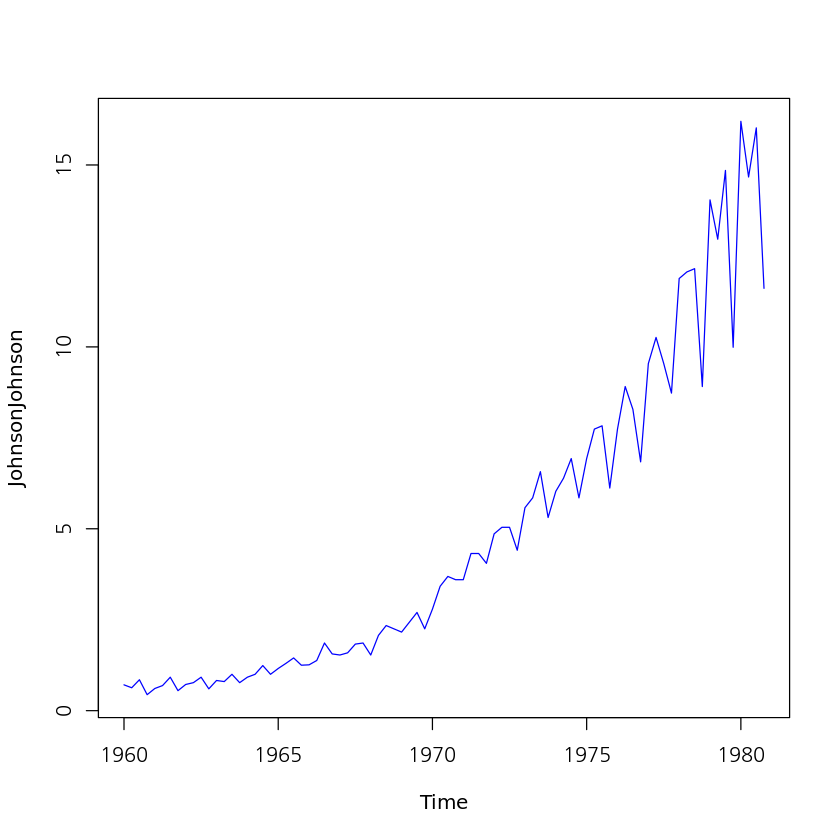

In [27]:
plot(JohnsonJohnson, type='l', col='blue')

### 태양 평균 흑점수



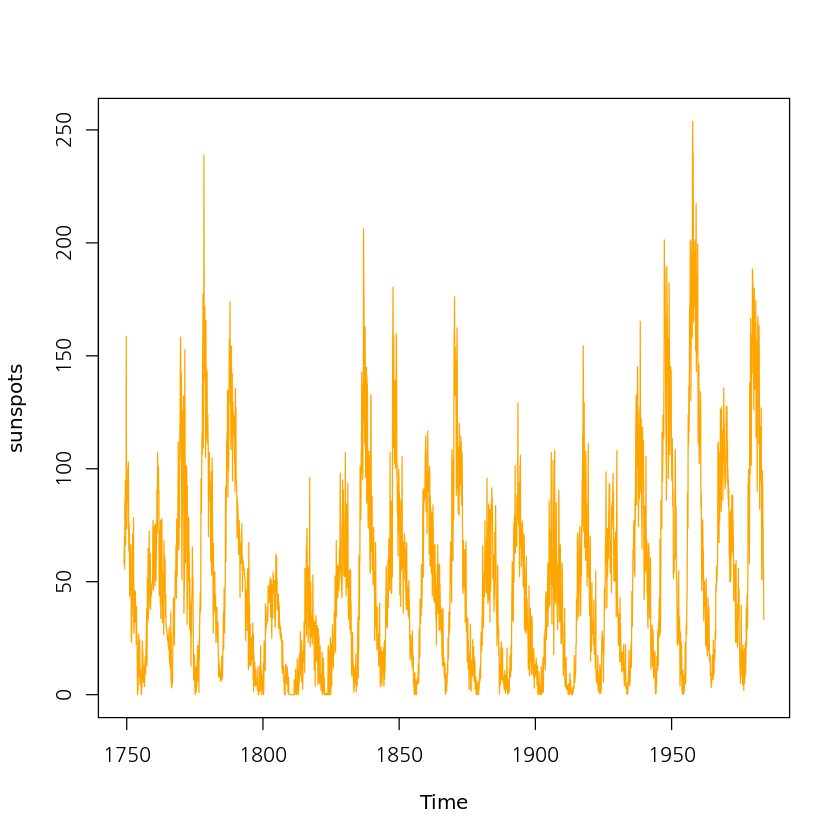

In [30]:
plot(sunspots, type='l', col='orange')

### 뉴하벤 연간기온

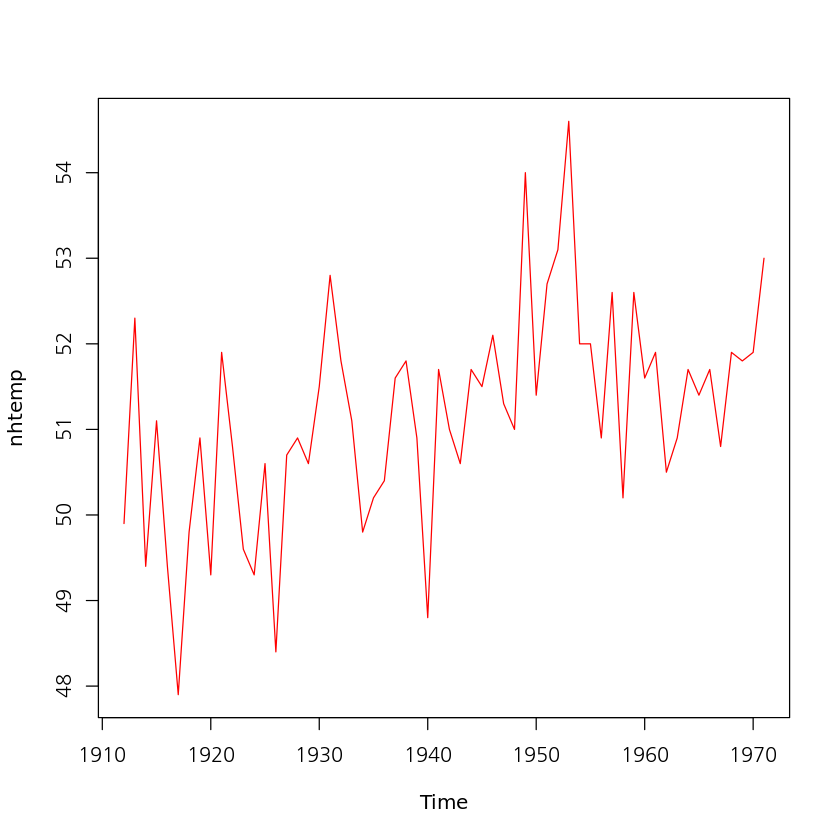

In [32]:
plot(nhtemp, type='l', col='red')